# Mediacom Engineering: CBRS Tower Analysis (Line of Sight study)
this script automates the process of identifying optimal tower locations, extracting relevant information, performing geospatial analyses, and visualizing Line of Sight visibility patterns for Towers within a specified region.This done within 3 parts

    Part 1: Extracting and Preparing Data
The first part of the script sets up the environment for geospatial analysis. It creates a new geodatabase and folder to store data. It locates a specific region, homes, and towers within that region. It extracts tower specifications from HTML content, performs spatial operations to filter and analyze towers and homes, and generates buffers around selected towers. The script calculates optimal tower locations based on the number of homes covered and their intersections. It prepares tower data for further analysis and presents the top tower options.

    DEM Download Process
This portion requires the user to follow the provided steps to download the needed DEM's from the internet

    Part 2: Visibility and Analysis
The second part of the script focuses on visibility analysis using raster data. It extracts digital elevation model (DEM) data and combines them into a single mosaic. It then extracts a raster within the area of interest. A point cloud is generated to extract tower ground-level elevation. The script performs spatial joins and generates a visibility raster to represent areas visible from towers. The visibility raster is converted to polygons for visualization. The script concludes by applying symbology to the visibility polygons, enhancing the visualization of areas with line-of-sight from the towers.

    Please see "Documentation" for further description

# Documentation:

    PART1:
The script starts by importing necessary libraries for working with spatial data (arcpy), managing files and directories (os), and dealing with dates (datetime). It also sets up a basic user interface by displaying messages to inform the user about script progress.
It establishes a workspace using the "geodatabase_path" variable, which points to a geodatabase containing the input data. It then creates a timestamp for generating unique output names and asks the user for input regarding the output folder, state (NAME_1), and county (NAME_2). It uses this information to create a new geodatabase in the specified output folder.
Using the information provided by the user, it constructs output names for different feature classes representing regions, homes within the region, and towers within the region.
The script contains functions to handle different tasks. "print_loading_message" function prints loading messages to keep the user informed about the script's progress. "select_features_by_location" function performs spatial selection operations to find features within a specified location.
It processes regions, homes, and towers one by one. It first locates the desired region by selecting features that match the user-provided state and county. It then applies a symbology style to the region feature. The process of locating homes and towers works similarly; it selects homes and towers within the region.
The script then extracts tower specifications from HTML popup info and stores this information in a table. It filters out towers with heights greater than 199 feet and creates buffers around these towers.
Finally, it applies logic to determine the most optimal combination of three towers. It calculates home counts within the intersection zones of these towers and selects the combination with the highest counts. It creates a new feature class containing these selected towers and their intersections.
The script concludes by printing the selected towers' names and related information. It also provides a link to download a Digital Elevation Model (DEM) for the user's specified region.
Throughout the script, there are various print statements to keep the user informed about the script's progress and results. Overall, the script processes spatial data, performs calculations, and applies logic to select the best tower combination based on specific criteria.

    Variable Definitions and Relations:
geodatabase_path: The path to the existing geodatabase where the input data is stored.

timestamp: The current timestamp in the format "YYYYMMDD_HHMMSS" used for creating unique identifiers in the new geodatabase and folders.

output_folder: User input for the path to the output folder where the new geodatabase and other files will be created.

name_1: User input representing the state (used for selecting features in the "region" processing).

name_2: User input representing the county (used for naming various outputs and intermediate variables).

new_gdb_name: The name of the new geodatabase, derived from name_2 and the timestamp.

new_gdb_path: The full path to the new geodatabase created in the specified output folder.

dem_folder_name: The name of the new folder created for DEM files.

dem_folder_path: The full path to the folder created for DEM files.

output_name, homes_within_output_name, towers_within_output_name: Strings used to construct output feature class names.

    Functions:

print_loading_message(message): A function that prints loading messages during processing.

select_features_by_location(source_layer, target_layer, output_layer): A function to select features by location and create a new feature class.

source_feature_class, source_feature_layer, expression: Variables used for selecting the region features based on user inputs.

tower_points, home_points, buffered_towers: Paths to various input and intermediate feature classes used for spatial analysis.

intersections: list that stores the tally of homes within interection count.

top_combinations: A list used to store top tower buffer combinations and their home counts.

A block of code to iterate through tower buffers, calculate intersections, and determine the most optimal tower location.

final_towers_to_print, final_towers_to_print2: Feature classes storing selected tower points and attributes for output.

Calculation and update of fields:

OfficialTowerH: Field storing the official tower height.

OfficialEstRad: Field storing the estimated radar elevation.

A loop to print selected fields for each row in final_towers_to_print2.

Printing a download link for acquiring a Digital Elevation Model (DEM) for the region.

## Variable Dictionary

**geodatabase_path**  
The path to the existing geodatabase containing necessary data.

**timestamp**  
A string containing the current date and time in the format "YYYYMMDD_HHMMSS".

**output_folder**  
The path to the folder where the new geodatabase and other outputs will be stored.

**name_1**  
A user-provided string representing the state (NAME_1).

**name_2**  
A user-provided string representing the county (NAME_2).

**new_gdb_name**  
The name of the new geodatabase, combining name_2 and the timestamp.

**new_gdb_path**  
The full path to the new geodatabase.

**dem_folder_name**  
A folder name combining "DEM", name_2, and the timestamp.

**dem_folder_path**  
The full path to the DEM folder.

**output_name**  
The name for the output feature class representing the county boundary.

**homes_within_output_name**  
The name for the output feature class representing homes within the county boundary.

**towers_within_output_name**  
The name for the output feature class representing towers within the county boundary.

**print_loading_message(message)**  
A function to print loading messages with a custom message.

**select_features_by_location(source_layer, target_layer, output_layer)**  
A function to select features by location and save them as a new layer.

**print_loading_message('Locating Region')**  
Prints a loading message for locating the region.

**source_feature_class**  
The path to the source feature class representing regions.

**source_feature_layer**  
A feature layer created from the source feature class.

**expression**  
An SQL expression used to select a specific region based on name_1 and name_2.

**output_name**  
The full path to the output county boundary feature class.

**towers_within_output_name**  
The name for the output feature class representing towers within the county boundary.

**print_loading_message('Locating Homes')**  
Prints a loading message for locating homes.

**print_loading_message('Locating Towers')**  
Prints a loading message for locating towers.

**print_loading_message('Please Wait.....Loading.......Extracting Tower Specs')**  
Prints a loading message for the tower extraction process.

**input_shapefile**  
The name of the input shapefile representing the towers within the county boundary.

**output_table**  
The name for the output table to store extracted tower information.

**extract_info(html_content)**  
A function that extracts tower information from HTML content using regular expressions.

**tower_height_pattern**  
A regular expression pattern for extracting tower height information from HTML content.

**structure_height_pattern**  
A regular expression pattern for extracting structure height information from HTML content.

**ground_elevation_pattern**  
A regular expression pattern for extracting ground elevation information from HTML content.

**relevant_info**  
A dictionary holding the extracted tower information.

**cursor.insertRow((oid, tower_height, structure_height, ground_elevation))**  
Inserts a row into the output table with the extracted tower information.

**arcpy.management.JoinField(towers_within_output_name, "OBJECTID", output_table, "OBJECTID", "TowerHeight;StructureHeight;GroundElevation")**  
Joins the extracted tower information fields to the towers_within_output_name feature class.

**arcpy.management.Delete(output_table)**  
Deletes the temporary output_table containing the extracted tower information.

**TowereGreaterThan199**  
The name for the output feature class representing towers greater than 199 feet.

**arcpy.management.Delete(towers_within_output_name)**  
Deletes the towers_within_output_name feature class.

**TowerBuff**  
The name for the output feature class representing buffered tower areas.

**TowerBuffWithCount**  
The name for the output feature class representing towers within buffer areas along with a count of homes within each buffer.

**arcpy.management.Delete(TowerBuff)**  
Deletes the temporary TowerBuff feature class.

**TowerBuffWithCount1**  
The name for the final feature class representing towers within buffer areas along with a count of homes within each buffer.

**input_feature_class**  
The input feature class containing towers within buffer areas and home count information.

**arcpy.management.Delete(TowerBuffWithCount1)**  
Deletes the temporary TowerBuffWithCount1 feature class.

**final_towers_to_print**  
The name for the output feature class representing the final selected towers to print.

**arcpy.management.Delete(final_towers_to_print2)**  
Deletes the temporary final_towers_to_print2 feature class.

**top_combinations**  
A list storing top tower combinations and their home counts within intersection zones.

**top_tower**  
The tower OID with the most homes.

**top_intersecting_towers**  
A list of tower OIDs intersecting with the top_tower.

**new_feature_class**  
The name for the output feature class containing selected tower buffers and their intersections.

**final_towers_to_print2**  
The name for the output feature class containing the final selected towers to print.





    DOWNLOAD INSTRUCTIONS:
see download section

    Part2:
To begin, it consolidates a collection of TIFF files from a designated folder, which generally contain elevation data. This assembly of files is combined using the MosaicToNewRaster_management tool, resulting in a comprehensive mosaic raster that holistically represents the elevation landscape within your specified region.
Subsequently, the script narrows down its focus by extracting a subset of the mosaic through a mask. This mask is established by your predefined area of interest, as delineated by the features within the new_feature_class. The outcome is a refined raster dataset that zeroes in on the elevation characteristics pertinent to your analysis area. Using the footprint of the Mask extracted DEM, a point cloud is generated. This is done to provide a source to extract the ground elevation of the towers location. Using a spatial join, the elevation point cloud can be related to the towers pointclass and provide a field, grid_code, to be used in the viewshed analysis. This field will be used as the input value for "Observer elevation" and the OfficalEstRad field will be used as the "Observer Offset". This Replaces the primary variable of final_towers_to_print2 with the new FullSpecTowers variable.
Building on this groundwork, the code advances to the generation of a viewshed raster—a visualization portraying visible and obstructed areas from specified viewpoints. Executing the Viewshed2 algorithm, the script computes visibility considerations by taking into account observer points (defined in FullSpecTowers), the previously extracted raster, and estimated observer heights. The "OfficialEstRad" field contributes to establishing observer heights, the "grid_code" field to establishing the groundlevel elevation, while the analysis spans horizontally across 360 degrees and vertically from 90 to -90 degrees.
Throughout these operations, the script conscientiously offers periodic status updates, ensuring you're apprised of the progression. Upon successful completion, a final message confirms the conclusion of the viewshed analysis, culminating in the generation of the viewshed raster.
In essence, this code segment guides the process of assembling elevation data, extracting area-specific information, and ultimately creating a detailed viewshed analysis—a powerful tool for understanding visibility patterns—within a meticulously monitored environment.
This tool uses geocentric 3D points for observers, targets, and elevation surface cell centers. A target is a surface cell center that has an optional, additional offset added to it. A geocentric 3D coordinate system is a right-handed Cartesian coordinate system with the center of the earth as the origin C, the x axis pointing to the intersection of the prime meridian and the equator, the Z axis pointing to the north pole, and the y axis rotated 90 degrees clockwise from the x axis while looking down from the north pole. See the following figures for an example of a target location T expressed with geocentric coordinates. To determine the visibility of each target, 3D sight lines from each observer to each target are constructed. See the figure below for an illustration of how the sight lines are constructed. The ground path of each sight line on the spheroid is determined and divided into cell size steps. At each step, the vertical distance d between the sight line and the surface is calculated. The elevation of ground is estimated using a linear Inverse Distance Weighted (IDW) approach using the nearest cell centers. If d is positive for all ground steps along the sight line, the target is considered visible; otherwise, it is considered not visible.

    Variable Definitions and Relations:
tiff_folder: The path to the folder containing TIFF files.

tiff_files: A list of paths to TIFF files within the tiff_folder.

mosaic_output_name: A string for the name of the mosaic output.

mosaic_output_path: The full path to the mosaic output.

out_raster: The extracted raster within the area of interest.

extracted_raster_output_name: The name of the extracted raster output.

extracted_raster_output_path: The full path to the extracted raster output.

pointCloud: The generated point cloud from the extracted raster.

FullSpecTowers: The result of the spatial join between tower points and the point cloud.

rela_table: A string representing the name of the relation table.

VisRas: The visibility raster generated using Viewshed2.

VisRasPoly: The visibility raster converted to polygons.

## Variable Dictionary

**workspace**  
The path to the directory where the geodatabase is located.

**input_shapefile**  
The name of the input shapefile (or feature class) stored in the workspace.

**output_table**  
The name of the output geodatabase table where the extracted data will be stored.

**fields_to_extract**  
A list of field labels provided by the user, specifying which data to extract from the HTML content.

**extract_info(html_content)**  
A function that takes HTML content as input and returns a dictionary of extracted data.

**relevant_info**  
A dictionary that holds the extracted data for each field specified in 'fields_to_extract'.

**field_label**  
A loop variable that iterates over the 'fields_to_extract' list to process each field.

**field_pattern**  
A regular expression pattern created dynamically based on the 'field_label'.

**field_match**  
A result of applying the 'field_pattern' to the HTML content to find a match for the specified field.

**arcpy.env.workspace**  
Sets the workspace environment for arcpy functions to operate in the specified directory.

**arcpy.CreateTable_management**  
Creates an empty geodatabase table in the specified workspace with the provided name.

**arcpy.AddField_management**  
Adds a field to a geodatabase table with the specified name and data type.

**with arcpy.da.InsertCursor**  
Opens an insert cursor for the output table, allowing data to be inserted row by row.

**with arcpy.da.SearchCursor**  
Opens a search cursor for the input shapefile, allowing data to be read row by row.

**oid**  
A variable holding the OID (Object ID) value from the current row in the input shapefile.

**html_content**  
A variable holding the HTML content from the 'PopupInfo' field in the current row.

**extracted_info**  
A dictionary containing the extracted information for the current HTML content.

**row_data**  
A list containing the extracted values for each field specified in 'fields_to_extract' for the current row.

**cursor.insertRow**  
Inserts a row into the output table, including the OID and extracted values for each field.

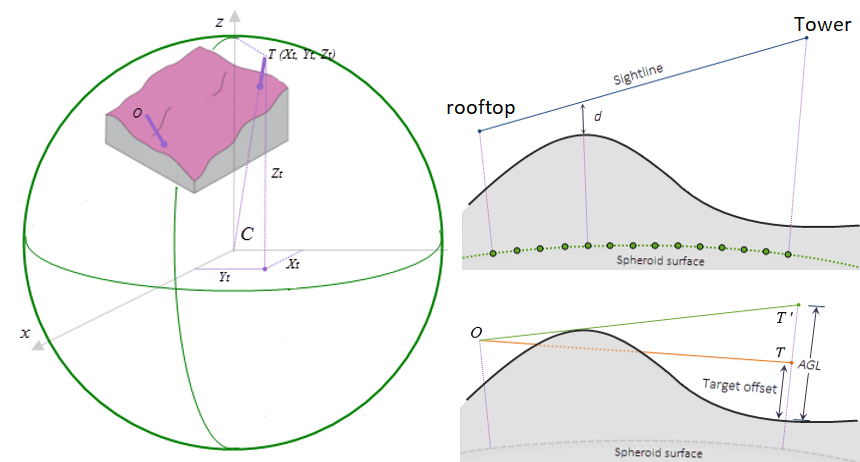

# Program Step1:

In [1]:
import arcpy
import os
from datetime import datetime 
import re
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


print('Please Wait....Loading....Building Environment')
# Set the workspace to the geodatabase path
geodatabase_path = r"V:\_Public\ERomaine\CBRSBulk\CBRS_LOS_LAYERS.gdb"
arcpy.env.workspace = geodatabase_path
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# Get user input for the output folder path
output_folder = input("Enter the path for the output folder (where is your current project?): ")
# Get user input for the new geodatabase name
name_1 = input("Enter NAME_1 (state) This is the state your tower is in: ")
name_2 = input("Enter NAME_2 (county) This is the county your tower is in: ")
new_gdb_name = f"{name_2}_{timestamp}"
new_gdb_path = os.path.join(output_folder, new_gdb_name + ".gdb")
arcpy.CreateFileGDB_management(output_folder, new_gdb_name + ".gdb")
# Create a folder with "DEM" prefix
dem_folder_name = f"DEM_{name_2}_{timestamp}"
dem_folder_path = os.path.join(output_folder, dem_folder_name)
os.mkdir(dem_folder_path)
print("New geodatabase and folder created successfully!")
# Set the workspace to the new geodatabase
arcpy.env.workspace = new_gdb_path
# Construct the output names
output_name = f"{name_2}CoBoundary"
homes_within_output_name = f"{name_2}HomesWithin"
towers_within_output_name = f"{name_2}CoTowersWithin"


# Print messages for progress
def print_loading_message(message):
    print(f'Please Wait....Loading....{message}')

    
# Function to select features by location
def select_features_by_location(source_layer, target_layer, output_layer):
    arcpy.management.MakeFeatureLayer(source_layer, "TempLayer")
    arcpy.management.SelectLayerByLocation("TempLayer", 'WITHIN', target_layer)
    arcpy.conversion.FeatureClassToFeatureClass("TempLayer", arcpy.env.workspace, output_layer)
    arcpy.management.Delete("TempLayer")
    
# Process region
print_loading_message('Locating Region')
source_feature_class = os.path.join(geodatabase_path, 'USA_adm2')
source_feature_layer = arcpy.management.MakeFeatureLayer(source_feature_class, "SourceFeatureLayer")
expression = f"NAME_1 = '{name_1}' AND NAME_2 = '{name_2}'"
arcpy.management.SelectLayerByAttribute(source_feature_layer, 'NEW_SELECTION', expression)
arcpy.conversion.FeatureClassToFeatureClass(source_feature_layer, arcpy.env.workspace, output_name)
arcpy.management.Delete(source_feature_layer)
arcpy.management.ApplySymbologyFromLayer(output_name, r"V:\_Public\ERomaine\CBRSBulk\CoBoundsSymbol.lyrx")
print('Region Found')

# Process homes
print_loading_message('Locating Homes')
select_features_by_location(os.path.join(geodatabase_path, 'BoltHP_lauchYes_point'), output_name, homes_within_output_name)
print('Homes Found')
# Process towers
print_loading_message('Locating Towers')
select_features_by_location(os.path.join(geodatabase_path, 'CBRS_Workbook_042922_Points'), output_name, towers_within_output_name)
arcpy.management.ApplySymbologyFromLayer(towers_within_output_name, r"V:\_Public\ERomaine\CBRSBulk\FirstTowerFullSymbol.lyrx")
print('Towers Found')

print('Please Wait.....Loading.......Extracting Tower Specs')
# Set up your workspace and inputs
input_shapefile = towers_within_output_name
output_table = 'ExtractedInfo'+timestamp

# Function to extract relevant information from HTML using regular expressions
def extract_info(html_content):
    relevant_info = {}
    
    # Define regular expression patterns for tower height, structure height, and ground elevation
    tower_height_pattern = re.compile(r'Tower Height[^\d]*([\d\.]+)', re.IGNORECASE)
    structure_height_pattern = re.compile(r'Structure Height[^\d]*([\d\.]+)', re.IGNORECASE)
    ground_elevation_pattern = re.compile(r'Ground Elevation[^\d]*([\d\.]+)', re.IGNORECASE)
    
    tower_height_match = tower_height_pattern.search(html_content)
    structure_height_match = structure_height_pattern.search(html_content)
    ground_elevation_match = ground_elevation_pattern.search(html_content)
    
    if tower_height_match:
        relevant_info['Tower Height'] = float(tower_height_match.group(1))
    if structure_height_match:
        relevant_info['Structure Height'] = float(structure_height_match.group(1))
    if ground_elevation_match:
        relevant_info['Ground Elevation'] = float(ground_elevation_match.group(1))
    
    return relevant_info

# Create a new table to store extracted information
arcpy.CreateTable_management(arcpy.env.workspace, output_table)
arcpy.AddField_management(output_table, 'OID', 'LONG')  # Add a field to store OID values
arcpy.AddField_management(output_table, 'TowerHeight', 'DOUBLE')
arcpy.AddField_management(output_table, 'StructureHeight', 'DOUBLE')
arcpy.AddField_management(output_table, 'GroundElevation', 'DOUBLE')

# Iterate through shapefile rows and extract information
with arcpy.da.InsertCursor(output_table, ['OID', 'TowerHeight', 'StructureHeight', 'GroundElevation']) as cursor:
    with arcpy.da.SearchCursor(input_shapefile, ['OID@', 'PopupInfo']) as search_cursor:
        for row in search_cursor:
            oid = row[0]
            html_content = row[1]
            extracted_info = extract_info(html_content)
            
            tower_height = extracted_info.get('Tower Height', None)
            structure_height = extracted_info.get('Structure Height', None)
            ground_elevation = extracted_info.get('Ground Elevation', None)
            
            cursor.insertRow((oid, tower_height, structure_height, ground_elevation))


            
arcpy.management.JoinField(towers_within_output_name,
                           "OBJECTID",
                           output_table,
                           "OBJECTID", 
                           "TowerHeight;StructureHeight;GroundElevation")
arcpy.management.Delete(output_table)
print('Tower Specs Generated')
TowereGreaterThan199= arcpy.analysis.Select(towers_within_output_name,
                                             f"{name_2}TowersGreaterThan_199_"+timestamp, 
                                            "TowerHeight > 199 Or StructureHeight > 199")
arcpy.management.Delete(towers_within_output_name)
print('Towers filtered by greater than 199 feet')
TowerBuff=arcpy.analysis.PairwiseBuffer(TowereGreaterThan199,
                                        f"{name_2}TowersBuff"+timestamp,
                                        "5 Miles",
                                        "NONE", 
                                        None,
                                        "PLANAR",
                                        "0 DecimalDegrees")
TowerBuffWithCount= arcpy.analysis.SpatialJoin(TowerBuff, 
                                               homes_within_output_name, 
                                               f"{name_2}TowerBuffwithCount"+timestamp,
                                               "JOIN_ONE_TO_ONE",
                                               "KEEP_ALL", 
                                               "", 
                                               "CONTAINS",
                                               None,
                                               '')
arcpy.management.Delete(TowerBuff)
print("Geoprocessing tasks completed successfully.")

TowerBuffWithCount1= arcpy.conversion.FeatureClassToFeatureClass(TowerBuffWithCount, 
                                                                 arcpy.env.workspace,
                                                                 f"{name_2}FinalTowerBuffer")
arcpy.management.Delete(TowerBuffWithCount)

print('Applying Logic to Determine the Most Optimal Tower')
# Paths data
tower_points = TowereGreaterThan199
home_points = homes_within_output_name

# Output paths
buffered_towers = TowerBuffWithCount1
intersections = f"n{name_2}Interect"

# Define paths to your tower buffer and homes feature classes
tower_buffers = buffered_towers
homes = homes_within_output_name

# Create a list to store tower buffer combinations and their home counts
top_combinations = []


# Iterate through each tower buffer
with arcpy.da.SearchCursor(tower_buffers, ["OID@", "SHAPE@"]) as tower_cursor:
    for tower_row in tower_cursor:
        tower_oid, tower_shape = tower_row

        # Create a list to store intersections and their home counts
        intersections = []

        # Iterate through all other tower buffers
        with arcpy.da.SearchCursor(tower_buffers, ["OID@", "SHAPE@"]) as other_cursor:
            for other_row in other_cursor:
                if other_row[0] != tower_oid:  # Skip the same tower buffer
                    other_shape = other_row[1]
                    intersection = tower_shape.intersect(other_shape, 2)  # 2 indicates intersection geometry type

                    # Calculate the number of homes within the intersection zone
                    home_count = 0
                    with arcpy.da.SearchCursor(homes, ["SHAPE@"]) as homes_cursor:
                        for home_row in homes_cursor:
                            home_shape = home_row[0]
                            if home_shape.overlaps(intersection):
                                home_count += 1

                    intersections.append((other_row[0], home_count))

        # Sort the intersections based on home count
        intersections.sort(key=lambda x: x[1], reverse=True)

        # Keep track of the top three tower buffer combinations
        top_combinations.append((tower_oid, intersections[:3]))

# Sort the top combinations based on the total home count within individual buffers and intersection zones
top_combinations.sort(key=lambda x: sum(y[1] for y in x[1]) + sum(y[1] for y in x[1]), reverse=True)

# Get the tower and intersecting tower OIDs with the most homes
top_tower = top_combinations[0][0]
top_intersecting_towers = [x[0] for x in top_combinations[0][1]]

# Create a new feature class containing selected tower buffers and their intersections
arcpy.management.CreateFeatureclass(
    arcpy.env.workspace, 
    arcpy.Describe(tower_buffers).name + "_selected", 
    "POLYGON", 
    spatial_reference=arcpy.Describe(tower_buffers).spatialReference
)

new_feature_class = arcpy.Describe(tower_buffers).name + "_selected"

with arcpy.da.InsertCursor(new_feature_class, ["SHAPE@"]) as insert_cursor:
    with arcpy.da.SearchCursor(tower_buffers, ["SHAPE@", "OID@"]) as tower_cursor:
        for tower_row in tower_cursor:
            tower_shape, tower_oid = tower_row
            if tower_oid == top_tower or tower_oid in top_intersecting_towers:
                insert_cursor.insertRow([tower_shape])
print("Tower with most homes:", top_tower)
print("Intersecting towers:", top_intersecting_towers)
# Create a new feature class for the final towers' points
final_towers_to_print = arcpy.management.CreateFeatureclass(
    arcpy.env.workspace, 
    "FinalTowersToPrint", 
    "POINT", 
    spatial_reference=arcpy.Describe(tower_points).spatialReference
)

# Insert the tower points used for the final buffer output
with arcpy.da.InsertCursor(final_towers_to_print, ["SHAPE@"]) as insert_cursor:
    with arcpy.da.SearchCursor(tower_points, ["SHAPE@", "OID@"]) as tower_cursor:
        for tower_row in tower_cursor:
            tower_shape, tower_oid = tower_row
            if tower_oid == top_tower or tower_oid in top_intersecting_towers:
                insert_cursor.insertRow([tower_shape])
                
final_towers_to_print2= arcpy.analysis.SpatialJoin(final_towers_to_print,
                           tower_points, 
                           f"n{name_2}FinalTowersSelect"+timestamp,
                           "JOIN_ONE_TO_ONE",
                           "KEEP_ALL",
                           "", 
                           "ARE_IDENTICAL_TO",
                            None,
                           '')

# Set up your workspace and input feature class
input_feature_class = final_towers_to_print2  # Path to your input feature class

# Add fields if they don't exist
if not arcpy.ListFields(input_feature_class, "OfficialTowerH"):
    arcpy.AddField_management(input_feature_class, "OfficialTowerH", "DOUBLE")

if not arcpy.ListFields(input_feature_class, "OfficialEstRad"):
    arcpy.AddField_management(input_feature_class, "OfficialEstRad", "DOUBLE")

# Update cursor to calculate OfficialTowerH and OfficialEstRad
with arcpy.da.UpdateCursor(input_feature_class, ["TowerHeight", "StructureHeight", "OfficialTowerH", "OfficialEstRad"]) as cursor:
    for row in cursor:
        tower_height = row[0]
        structure_height = row[1]

        # Calculate OfficialTowerH as the non-null value between TowerHeight and StructureHeight
        if tower_height is None:
            official_tower_height = structure_height
        else:
            official_tower_height = tower_height
        
        # Calculate OfficialEstRad based on OfficialTowerH
        if official_tower_height is not None:
            official_est_rad = (official_tower_height * 0.3048) - 6
        else:
            official_est_rad = None
        
        # Update the fields
        row[2] = official_tower_height
        row[3] = official_est_rad
        cursor.updateRow(row)

print("Calculation and updating of fields completed.")
print('Complete! Best 4 Towers Have Been Selected')
# List of field names to print                                                               
arcpy.management.Delete(TowerBuffWithCount1)

print('↓↓↓↓↓↓↓Please Review Selected Towers↓↓↓↓↓↓')

fields_to_print = ["Name", "OfficialTowerH", "OfficialEstRad",]

# Print the selected fields for each row
with arcpy.da.SearchCursor(final_towers_to_print2, fields_to_print) as cursor:
    for row in cursor:
        print(f"Name: {row[0]}")
        print(f"Tower Height in feet: {row[1]}")
        print(f"Estimated RAD Elevation in meters: {row[2]}\n")

        
print('Aquire Digital Elevation Model for Your Region')
download_link = "https://apps.nationalmap.gov/downloader/"
print(f"Click the following link to access the download page: {download_link}")
print('You may want to copy link and paste into browser URL, there can be complications with pop-up blockers that will prevent the download')


Please Wait....Loading....Building Environment
Enter the path for the output folder (where is your current project?): C:\Users\Eric.Romaine\Documents\ArcGIS\Projects\LocalToolBuildingandScripting
Enter NAME_1 (state) This is the state your tower is in: Alabama
Enter NAME_2 (county) This is the county your tower is in: Escambia
New geodatabase and folder created successfully!
Please Wait....Loading....Locating Region
Region Found
Please Wait....Loading....Locating Homes
Homes Found
Please Wait....Loading....Locating Towers
Towers Found
Please Wait.....Loading.......Extracting Tower Specs
Tower Specs Generated
Towers filtered by greater than 199 feet
Geoprocessing tasks completed successfully.
Applying Logic to Determine the Most Optimal Tower
Tower with most homes: 1
Intersecting towers: [2, 3, 4]
Calculation and updating of fields completed.
Complete! Best 4 Towers Have Been Selected
↓↓↓↓↓↓↓Please Review Selected Towers↓↓↓↓↓↓
Name: 421199 - Brewton AL
Tower Height in feet: 280.0
Estima

# DEM (digital elevation model) Download Instructions:
Complete and move to Program Step 2

Enter in the region of your study and select go. Once the webmap pans to your area of interest, select "Map Extent/Geometry", then Select "Elevation Products (3DEP)". Ensure that the "1/3 arc-second DEM" option is selected, and finally hit "Search Products"
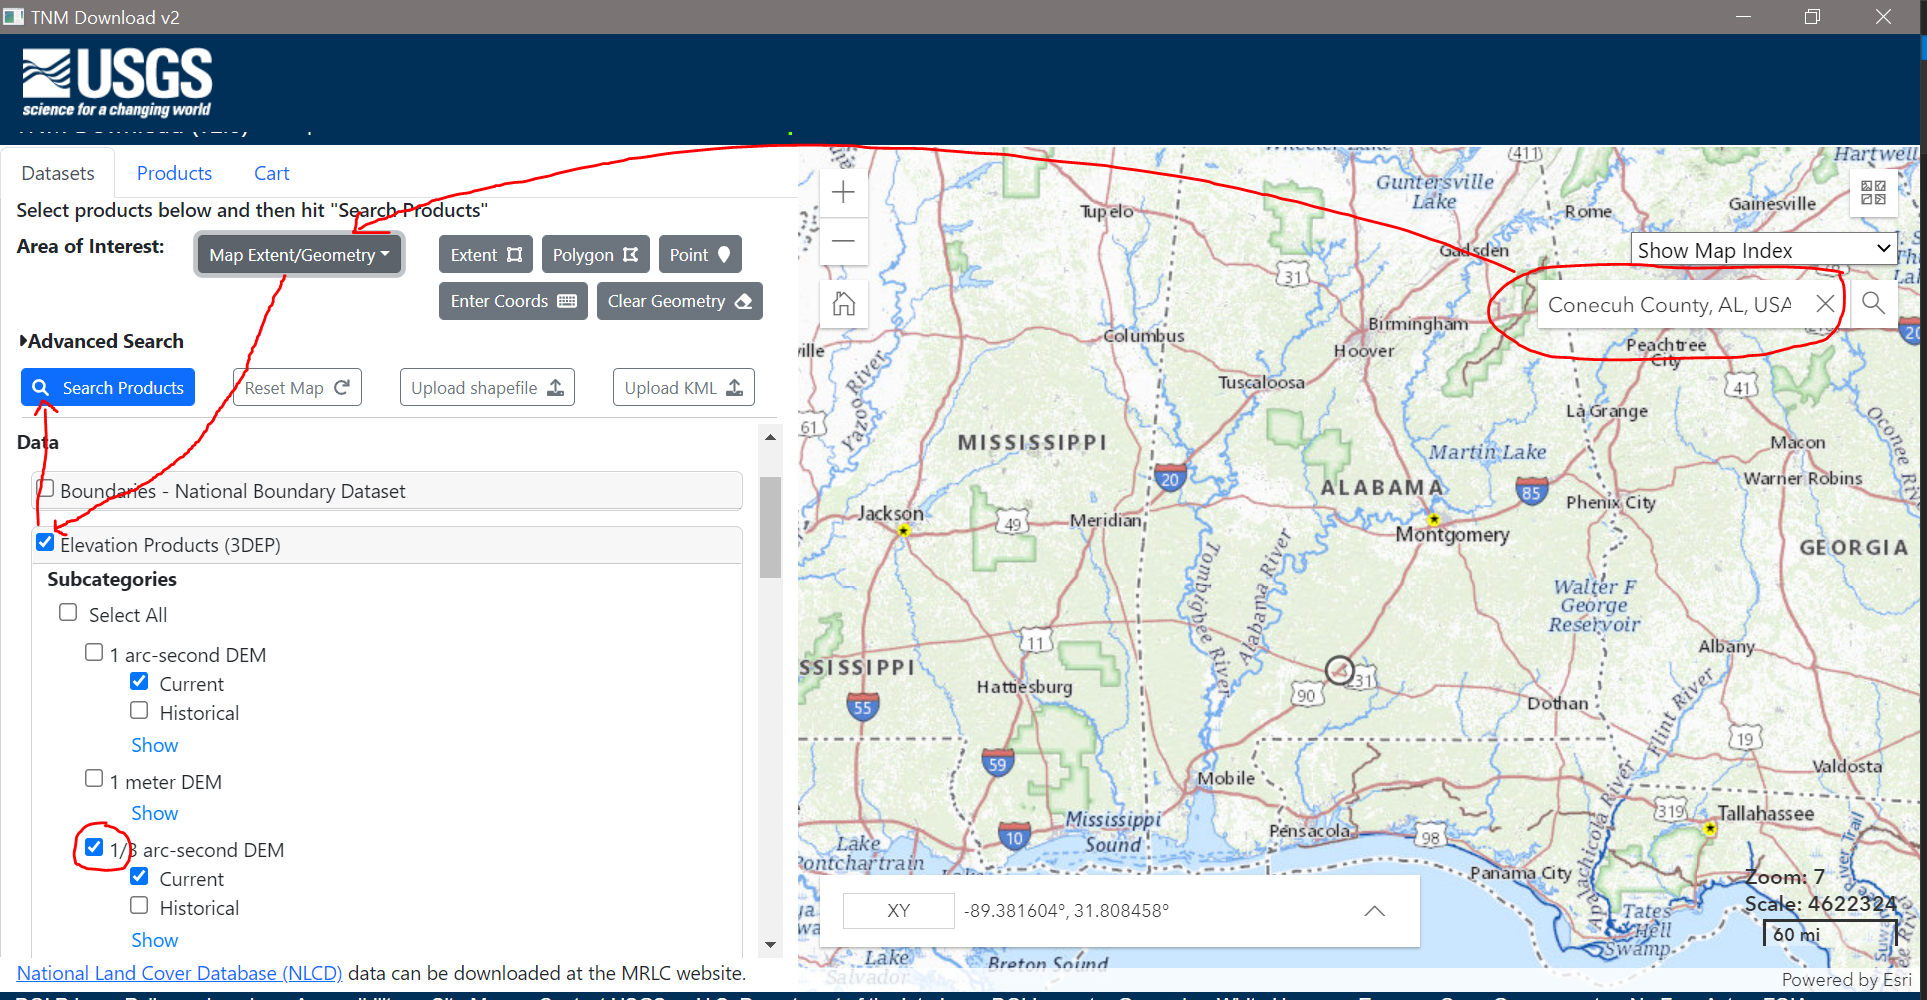

As you hover over available options in the left side panel, you will notice that the corresponding region is "darkened" in the webmap viewer to the right. Ensure that you full cover your region. This may require you to download multiple DEM's if you region is larger. Its better to have more than less, this ensures that you can simulate the ground surface for your entire area of interest
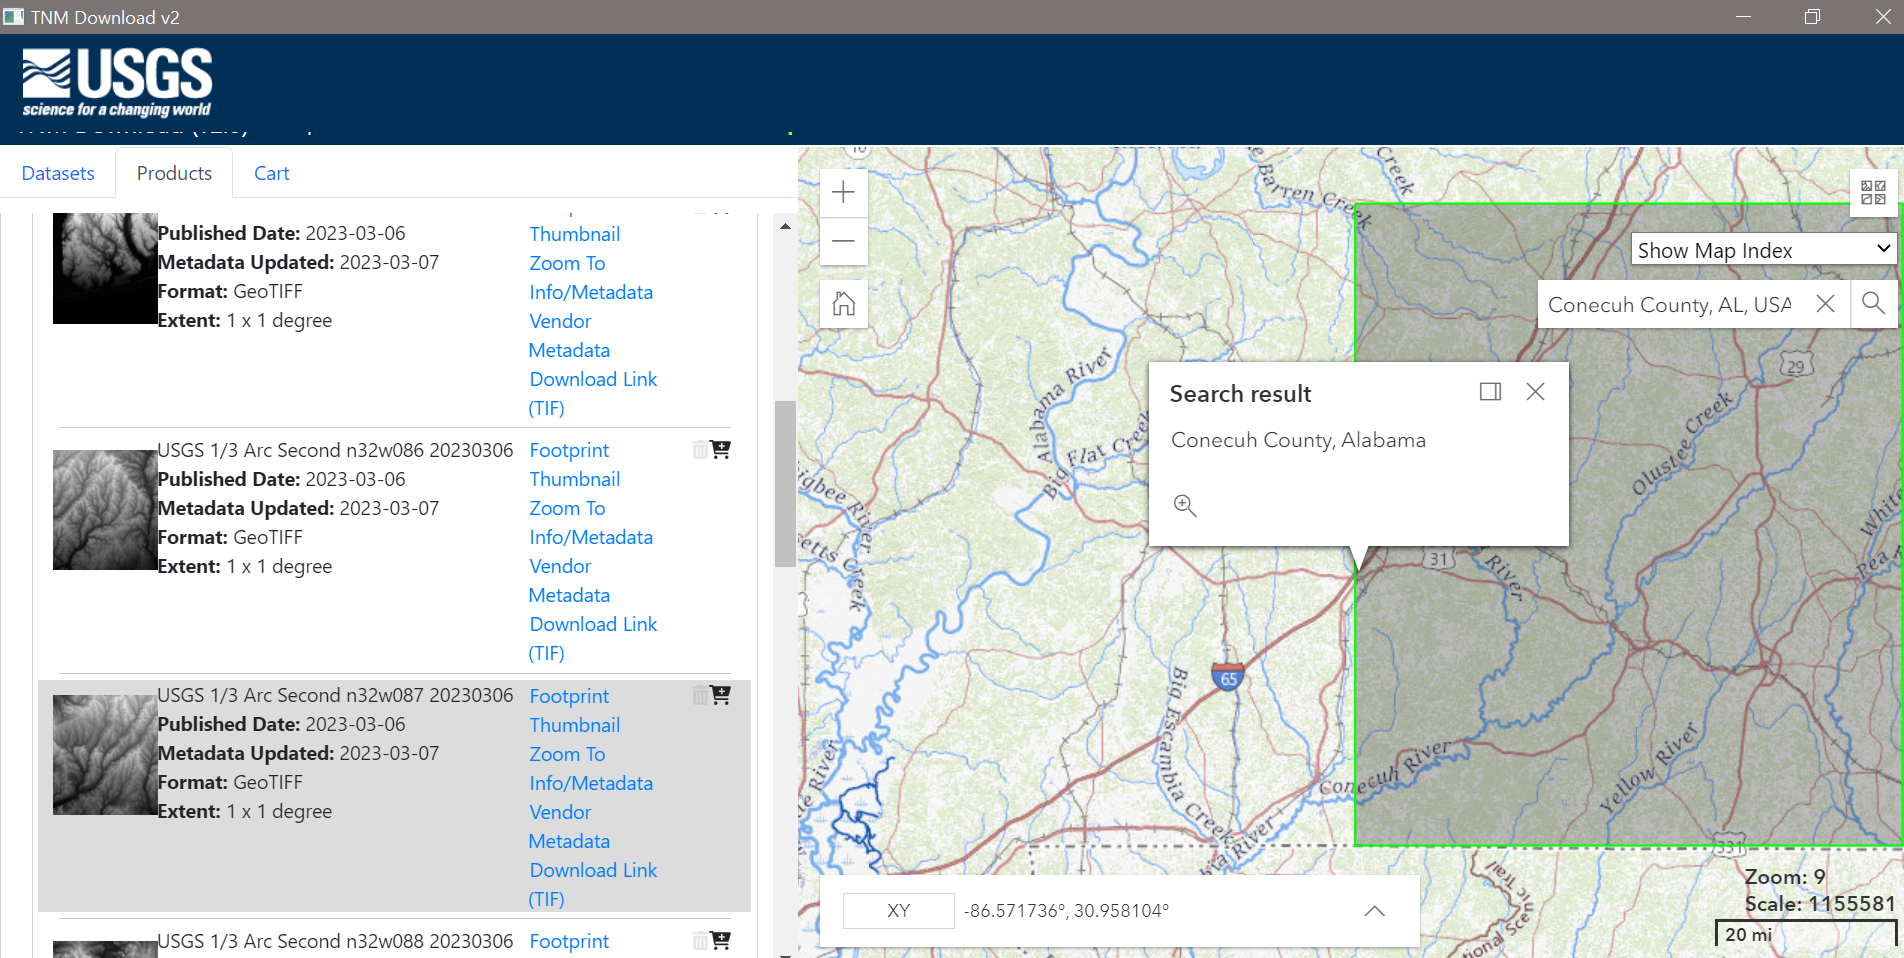

Begin the download by selecting "Download Link (TIFF)"
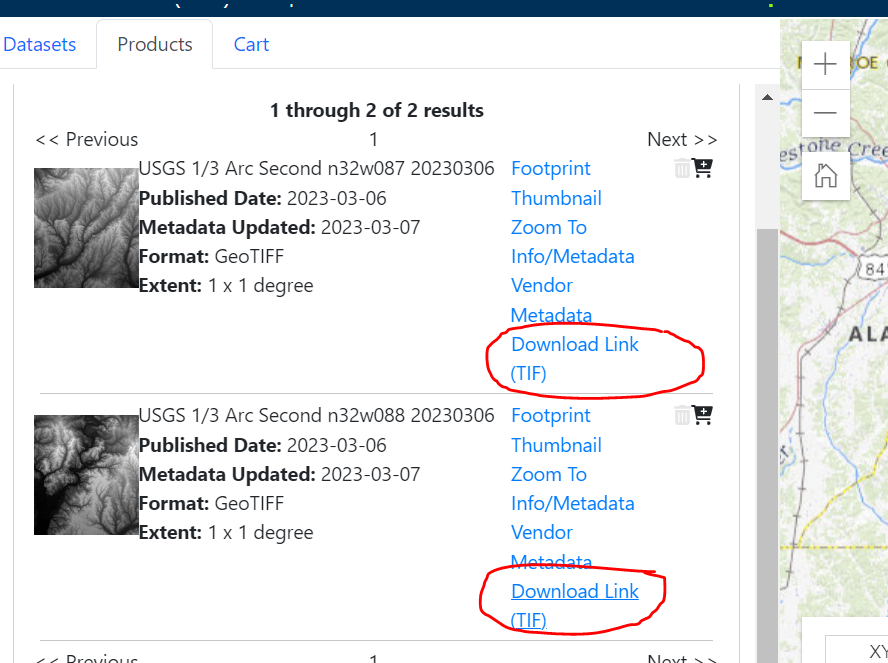



Once the download is complete, move them from your Downloads folder to the folder begining with "DEM", followed by the name of your area of interest. This folder was automatically generated at the begining and is paired with the local GDB that was also created, sharing the region naming convention.
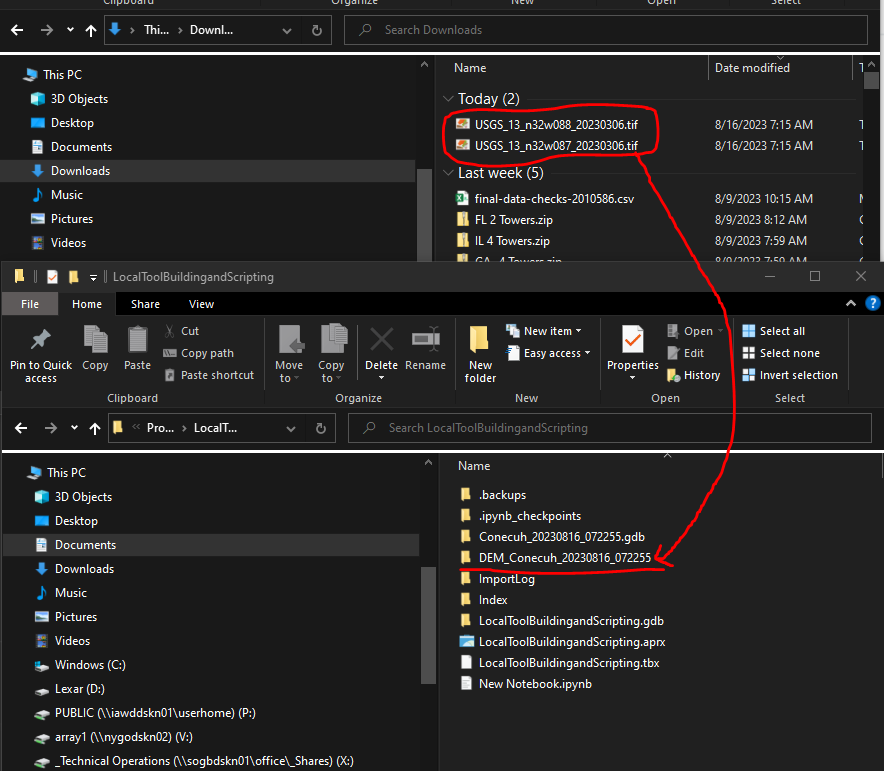

# Program Step 2:

In [2]:
print("Please Wait......Extracting DEM's from your location and combining them into one, ready for use")
# Get a list of TIFF files from a folder
tiff_folder = dem_folder_path  # Use the same folder as the DEM folder
tiff_files = glob.glob(os.path.join(tiff_folder, "*.tif"))  # Adjust the file extension if needed
# Perform Mosaic to New Raster operation
mosaic_output_name = "tif"
mosaic_output_path = os.path.join(new_gdb_path, mosaic_output_name)

arcpy.MosaicToNewRaster_management(tiff_files, new_gdb_path, mosaic_output_name,
                                  pixel_type="32_BIT_FLOAT", number_of_bands=1)

print("Mosaic to New Raster operation completed successfully!")
print("Please Wait.........Extracting the Raster For Within Your Area of Interest")
# Extract by Mask
extracted_raster_output_name = f"{name_2}AOIraster"
extracted_raster_output_path = os.path.join(new_gdb_path, extracted_raster_output_name)

out_raster = arcpy.sa.ExtractByMask(mosaic_output_path, new_feature_class)
out_raster.save(extracted_raster_output_path)
arcpy.management.Delete(mosaic_output_name)
print("Extract by Mask operation completed successfully!")
print("Please Wait.........Generating Point Cloud For Extracting Tower Groundlevel Elevation")
print("This Portion May Take a Few Minutes------est. 2-8 mins")
with arcpy.EnvManager(outputCoordinateSystem='GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'):
    pointCloud= arcpy.conversion.RasterToPoint(out_raster,
                                   f"{name_2}PointCloud"
                                   , "Value")
FullSpecTowers= arcpy.analysis.SpatialJoin(final_towers_to_print2,
                                           pointCloud,
                                           f"{name_2}FullspecTowers",
                                           'JOIN_ONE_TO_ONE', 'KEEP_ALL',"", 'CLOSEST')
arcpy.management.Delete(pointCloud)
print("Point Cloud Generated! Tower ground elevation extracted and assigned to coordinates")
print("Please Wait.........Generating Visibility Raster Using Estimated RAD Heights")
print("This Portion May Take a Few Minutes------est. 5-15 mins")


#Problem Section↓↓↓↓↓
print("Please Wait......Extracting DEM's from your location and combining them into one, ready for use")
# Get a list of TIFF files from a folder
tiff_folder = dem_folder_path  # Use the same folder as the DEM folder
tiff_files = glob.glob(os.path.join(tiff_folder, "*.tif"))  # Adjust the file extension if needed
# Perform Mosaic to New Raster operation
mosaic_output_name = "tif"
mosaic_output_path = os.path.join(new_gdb_path, mosaic_output_name)

arcpy.MosaicToNewRaster_management(tiff_files, new_gdb_path, mosaic_output_name,
                                  pixel_type="32_BIT_FLOAT", number_of_bands=1)

print("Mosaic to New Raster operation completed successfully!")
print("Please Wait.........Extracting the Raster For Within Your Area of Interest")
# Extract by Mask
extracted_raster_output_name = f"{name_2}AOIraster"
extracted_raster_output_path = os.path.join(new_gdb_path, extracted_raster_output_name)

out_raster = arcpy.sa.ExtractByMask(mosaic_output_path, new_feature_class)
out_raster.save(extracted_raster_output_path)
arcpy.management.Delete(mosaic_output_name)
print("Extract by Mask operation completed successfully!")
print("Please Wait.........Generating Point Cloud For Extracting Tower Groundlevel Elevation")
print("This Portion May Take a Few Minutes------est. 2-8 mins")
with arcpy.EnvManager(outputCoordinateSystem='GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'):
    pointCloud= arcpy.conversion.RasterToPoint(out_raster,
                                   f"{name_2}PointCloud"
                                   , "Value")
FullSpecTowers= arcpy.analysis.SpatialJoin(final_towers_to_print2,
                                           pointCloud,
                                           f"{name_2}FullspecTowers",
                                           'JOIN_ONE_TO_ONE', 'KEEP_ALL',"", 'CLOSEST')
arcpy.management.Delete(pointCloud)
print("Point Cloud Generated! Tower ground elevation extracted and assigned to coordinates")
print("Please Wait.........Generating Visibility Raster Using Estimated RAD Heights")
print("This Portion May Take a Few Minutes------est. 5-15 mins")
rela_table= "outTable_Rela"
VisRas= arcpy.sa.Viewshed2(out_raster, FullSpecTowers,
                   None, 'OBSERVERS',"0 Meters",
                   rela_table,0.13,"0 Meters", 
                   'grid_code', 'OfficialEstRad',
                   None, 'GROUND',None, 'GROUND',
                   0,360,90,-90, 'ALL_SIGHTLINES')
output_raster_name = f"{name_2}Viewshedraster.tif"
output_raster_path = os.path.join(dem_folder_path, output_raster_name)

VisRas.save(output_raster_path)

arcpy.management.JoinField(VisRas, "Value", rela_table, "Region", "Observer")
VisRasPoly=arcpy.conversion.RasterToPolygon(VisRas,
                                 "VisRasPoly",
                                 "SIMPLIFY",
                                 "Observer",
                                 "MULTIPLE_OUTER_PART",
                                 None)
arcpy.management.Delete(VisRas)

arcpy.management.JoinField(VisRasPoly, "gridcode", FullSpecTowers, "OBJECTID", "Name")

print("Viewshed Raster Complete and Converted to Ploygons")

# List of OBJECTID values to iterate through
object_ids = [1, 2, 3, 4]

# Loop through each OBJECTID value
for object_id in object_ids:
    # Select the features based on OBJECTID
    arcpy.management.SelectLayerByAttribute(new_feature_class, "NEW_SELECTION", f"OBJECTID = {object_id}", None)

    # Perform the necessary clipping operation
    cliprast = arcpy.analysis.Select(VisRasPoly, f"VisRasPoly_Layer8_Select", f"OBJECTID = {object_id}")
    arcpy.analysis.Clip(cliprast, new_feature_class, f"Extract{object_id}", None)

# Merge the extracted features
extracts_to_merge = ";".join([f"Extract{object_id}" for object_id in object_ids])
Splt_Merge_Towers = arcpy.management.Merge(extracts_to_merge, f"{name_2}T_Extract4_Merge", '', "NO_SOURCE_INFO")





arcpy.management.SelectLayerByAttribute(new_feature_class, "NEW_SELECTION", "OBJECTID IS NOT NULL", None)
SumWithVRP= "VisRasPoly_SummaWithin"
arcpy.analysis.SummarizeWithin(Splt_Merge_Towers,
                               homes_within_output_name,
                               SumWithVRP,
                               "KEEP_ALL",
                               None,
                               "ADD_SHAPE_SUM", 
                               '',
                               None,
                               "NO_MIN_MAJ",
                               "NO_PERCENT",
                               None)
SumWithTbuf= "FinalTowerBuffer_SummW"
arcpy.analysis.SummarizeWithin(new_feature_class, homes_within_output_name,
                               SumWithTbuf,
                               "KEEP_ALL", None, "ADD_SHAPE_SUM",
                               '', None, "NO_MIN_MAJ", "NO_PERCENT", None)
arcpy.management.CalculateField(SumWithVRP, "Count of Points In Tower Sight", "!Point_Count!",
                                "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")
arcpy.management.CalculateField(SumWithTbuf, "Count of Points In Region", "!Point_Count!",
                                "PYTHON3", '', "DOUBLE", "NO_ENFORCE_DOMAINS")

arcpy.management.JoinField(SumWithVRP, "OBJECTID", SumWithTbuf, "OBJECTID", "Count_of_Points_In_Region")
arcpy.management.CalculateField(SumWithVRP,
                                "Percent Coverage",
                                "!Count_of_Points_In_Tower_Sight! / !Count_of_Points_In_Region!",
                                "PYTHON3", '', "DOUBLE",
                                "NO_ENFORCE_DOMAINS")
arcpy.management.DeleteField(SumWithVRP, "Point_Count", "DELETE_FIELDS")

feature_class_path = SumWithVRP

# Get the list of field names
field_names = [field.name for field in arcpy.ListFields(feature_class_path)]

# Create an empty list to store the attribute data
attribute_data = []

# Use arcpy.da.SearchCursor to retrieve the attribute data
with arcpy.da.SearchCursor(feature_class_path, field_names) as cursor:
    for row in cursor:
        attribute_data.append(row)

# Create a pandas DataFrame from the attribute data
attribute_df = pd.DataFrame(attribute_data, columns=field_names)

# Display the DataFrame
attribute_df

Please Wait......Extracting DEM's from your location and combining them into one, ready for use
Mosaic to New Raster operation completed successfully!
Please Wait.........Extracting the Raster For Within Your Area of Interest
Extract by Mask operation completed successfully!
Please Wait.........Generating Point Cloud For Extracting Tower Groundlevel Elevation
This Portion May Take a Few Minutes------est. 2-8 mins
Point Cloud Generated! Tower ground elevation extracted and assigned to coordinates
Please Wait.........Generating Visibility Raster Using Estimated RAD Heights
This Portion May Take a Few Minutes------est. 5-15 mins
Please Wait......Extracting DEM's from your location and combining them into one, ready for use
Mosaic to New Raster operation completed successfully!
Please Wait.........Extracting the Raster For Within Your Area of Interest
Extract by Mask operation completed successfully!
Please Wait.........Generating Point Cloud For Extracting Tower Groundlevel Elevation
This

OBJECTID  ... Percent_Coverage
0         1  ...         0.730453
1         2  ...         0.036017
2         3  ...         0.658824
3         4  ...         0.148208

[4 rows x 10 columns]

In [ ]:

""""arcpy.management.SelectLayerByAttribute(new_feature_class, "NEW_SELECTION", "OBJECTID = 1", None)

cliprast= arcpy.analysis.Select(VisRasPoly, "VisRasPoly_Layer8_Select","OBJECTID = 1")

arcpy.analysis.Clip(cliprast, new_feature_class, "Extract1", None)

arcpy.management.SelectLayerByAttribute(new_feature_class, "NEW_SELECTION", "OBJECTID = 2", None)

cliprast= arcpy.analysis.Select(VisRasPoly, "VisRasPoly_Select","OBJECTID = 2")

arcpy.analysis.Clip(cliprast, new_feature_class, "Extract2", None)

arcpy.management.SelectLayerByAttribute(new_feature_class, "NEW_SELECTION", "OBJECTID = 3", None)

cliprast= arcpy.analysis.Select(VisRasPoly, "VisRasPoly_Layer8_Select","OBJECTID = 3")

arcpy.analysis.Clip(cliprast, new_feature_class, "Extract3", None)

arcpy.management.SelectLayerByAttribute(new_feature_class, "NEW_SELECTION", "OBJECTID = 4", None)

cliprast= arcpy.analysis.Select(VisRasPoly, "VisRasPoly_Layer8_Select","OBJECTID = 4")

arcpy.analysis.Clip(cliprast, new_feature_class, "Extract4", None)

Splt_Merge_Towers= arcpy.management.Merge("Extract4;Extract3;Extract2;Extract1",f"{name_2}T_Extract4_Merge",'',"NO_SOURCE_INFO")
""""

    Example Output:
    Each towers LOS is determined by a unique color
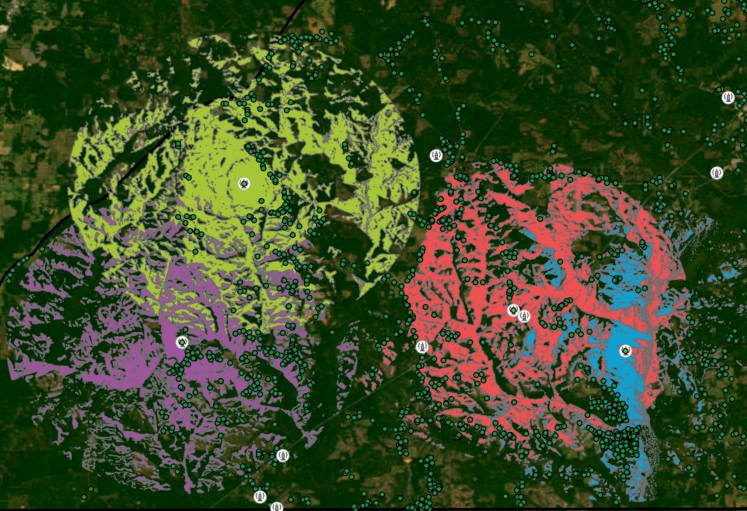